## Imports

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
from astroquery.jplhorizons import Horizons
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Color Palettes

In [72]:
colors = ['#01b9cc','#f51720','#743480','#56c410','#f8d210','#bd97cb','#c4ae78','#f99b45','#fa26a0']
#colors = ['#01b9cc','#f51720','#743480','#56c410']

# The SkyMapper DR3 SSOs
-------------------------------

## First DataFrame

In [26]:
#skm-obs: Object table contains a single entry per SSO, with its average colors
skmobs = pd.read_csv('Skymapper.csv')

In [3]:
skmobs

,Number,Name,JD,Color,color,e_color,recno
0,29040.0,1002 T-2,2.458751e+06,i-z,0.0707,0.0216,1
1,90645.0,1004 T-3,2.458309e+06,i-z,-0.1175,0.0153,2
2,90645.0,1004 T-3,2.458310e+06,g-r,0.2845,0.0058,3
3,90645.0,1004 T-3,2.458310e+06,g-i,0.4336,0.0058,4
4,90645.0,1004 T-3,2.458310e+06,g-z,0.3901,0.0106,5
...,...,...,...,...,...,...,...
99994,96617.0,1999 CC32,2.457879e+06,v-i,2.2164,0.0106,99995
99995,96617.0,1999 CC32,2.457879e+06,u-z,2.6367,0.0347,99996
99996,96617.0,1999 CC32,2.457879e+06,v-z,2.0891,0.0137,99997
99997,96617.0,1999 CC32,2.457879e+06,u-v,0.5476,0.0344,99998


In [27]:
#Get rid of Nan values for future calculations
skmobs = skmobs.dropna(how='any')
#Formatting
skmobs.Number = skmobs.Number.astype(int)

In [14]:
skmobs

,Number,Name,JD,Color,color,e_color,recno
0,29040,1002 T-2,2.458751e+06,i-z,0.0707,0.0216,1
1,90645,1004 T-3,2.458309e+06,i-z,-0.1175,0.0153,2
2,90645,1004 T-3,2.458310e+06,g-r,0.2845,0.0058,3
3,90645,1004 T-3,2.458310e+06,g-i,0.4336,0.0058,4
4,90645,1004 T-3,2.458310e+06,g-z,0.3901,0.0106,5
...,...,...,...,...,...,...,...
99994,96617,1999 CC32,2.457879e+06,v-i,2.2164,0.0106,99995
99995,96617,1999 CC32,2.457879e+06,u-z,2.6367,0.0347,99996
99996,96617,1999 CC32,2.457879e+06,v-z,2.0891,0.0137,99997
99997,96617,1999 CC32,2.457879e+06,u-v,0.5476,0.0344,99998


## Basic Plots
### Exploring our dataset

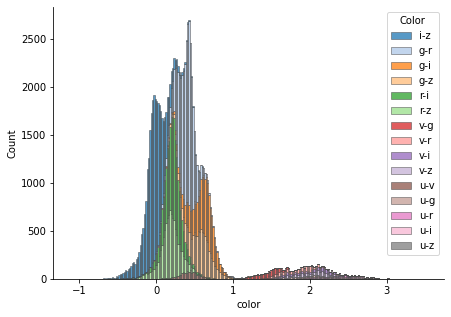

In [16]:
#Let's see the colors distribution

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    skmobs,
    x="color", hue="Color",
    multiple="stack",
    palette="tab20",
    edgecolor=".3",
    linewidth=.5,)
pass

We can estimate the KDE using Gaussian mixture

In [47]:
z = skmobs['color'].to_numpy()
z = z.reshape(-1, 1)

In [48]:
from sklearn import mixture
N = np.arange(1, 20)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = mixture.GaussianMixture(N[i]).fit(z)

# compute the AIC and the BIC
AIC = [m.aic(z) for m in models]
BIC = [m.bic(z) for m in models]

¿How many Gaussian describes this data?

In [49]:
print(models[np.argmin(AIC)])

GaussianMixture(n_components=10)


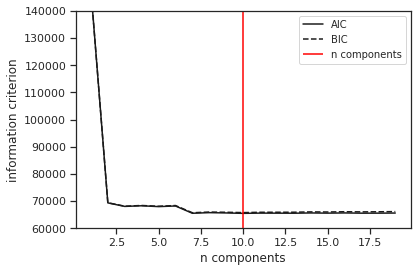

In [57]:
# plot: AIC and BIC
fig = plt.figure(figsize=(6, 4))
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')
plt.xlabel('n components')
plt.ylabel('information criterion')
plt.vlines(10,50000,145000,color='red', label='n components')
plt.ylim(60000,140000)
plt.legend(loc='best', fontsize=10)

Text(0, 0.5, '$p(x)$')

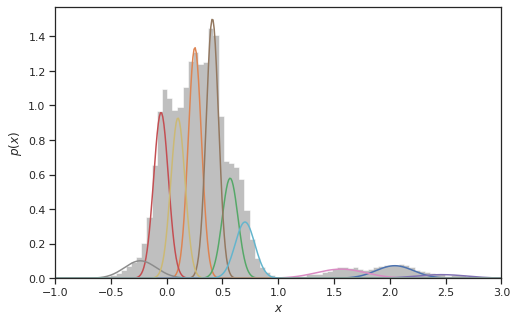

In [58]:
# plot: data + best-fit mixture
fig = plt.figure(figsize=(8, 5))
M_best = models[np.argmin(AIC)]
#M_best = models[6] This line is for testing different n comp
x = np.linspace(-5, 5, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(z, 100, density=True, histtype='stepfilled', alpha=0.5,color='grey')
#plt.plot(x, pdf, '-k')
plt.plot(x, pdf_individual, '-')
plt.xlim(-1,3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

Does it seem a little bit overfitted?

The simplest model would be:

Text(0, 0.5, '$p(x)$')

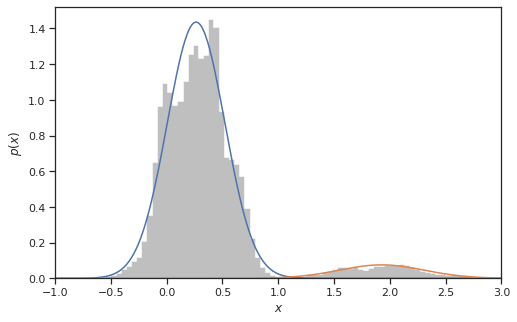

In [66]:
# plot: data + best-fit mixture
fig = plt.figure(figsize=(8, 5))
M_best = models[1]
x = np.linspace(-5, 5, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(z, 100, density=True, histtype='stepfilled', alpha=0.5,color='grey')
#plt.plot(x, pdf, '-k')
plt.plot(x, pdf_individual, '-')
plt.xlim(-1,3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

Another option could be:

Text(0, 0.5, '$p(x)$')

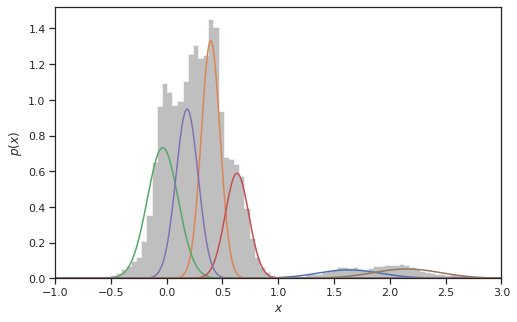

In [67]:
# plot: data + best-fit mixture
fig = plt.figure(figsize=(8, 5))
M_best = models[5]
x = np.linspace(-5, 5, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(z, 100, density=True, histtype='stepfilled', alpha=0.5,color='grey')
#plt.plot(x, pdf, '-k')
plt.plot(x, pdf_individual, '-')
plt.xlim(-1,3)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

It would be interesting to discriminate per taxonomic type

## Second DataFrame

In [28]:
#skm-taxo: Taxonomy table contains the estimated taxonomy and orbital elements of asteroids
skmtax = pd.read_csv('Skymapper-taxo.csv')

In [31]:
skmtax

,Number,Name,DynClass,complex,pcomplex,complex2,pcomplex2,nc,recno
0,90645.0,1004 T-3,MB>Outer,B,0.592,pU,0.408,1,1
1,20937.0,1005 T-2,MB>Outer,U,0.930,pK,0.062,1,2
2,90646.0,1008 T-3,MB>Outer,C,0.601,NaN,NaN,5,3
3,175653.0,1014 T-3,MB>Middle,C,0.686,NaN,NaN,5,4
4,32695.0,1016 T-2,MB>Middle,U,0.925,pX,0.061,1,5
...,...,...,...,...,...,...,...,...,...
120561,73700.0,von Kues,MB>Outer,S,0.125,pS,0.125,1,120562
120562,10762.0,von Laue,MB>Outer,K,0.802,pB,0.105,2,120563
120563,2350.0,von Lude,MB>Inner,S,1.000,pC,0.000,1,120564
120564,22788.0,von Steuben,MB>Inner,L,0.944,pU,0.032,1,120565


In [30]:
skmtax = skmtax.dropna(how='any')
skmtax.Number = skmtax.Number.astype(int)

In [22]:
skmtax

,Number,Name,DynClass,complex,pcomplex,complex2,pcomplex2,nc,recno
0,90645,1004 T-3,MB>Outer,B,0.592,pU,0.408,1,1
1,20937,1005 T-2,MB>Outer,U,0.930,pK,0.062,1,2
4,32695,1016 T-2,MB>Middle,U,0.925,pX,0.061,1,5
6,19052,1017 T-2,MB>Outer,X,0.218,pX,0.218,1,7
7,118085,1019 T-3,MB>Outer,C,0.535,pX,0.384,2,8
...,...,...,...,...,...,...,...,...,...
120561,73700,von Kues,MB>Outer,S,0.125,pS,0.125,1,120562
120562,10762,von Laue,MB>Outer,K,0.802,pB,0.105,2,120563
120563,2350,von Lude,MB>Inner,S,1.000,pC,0.000,1,120564
120564,22788,von Steuben,MB>Inner,L,0.944,pU,0.032,1,120565


I want to merge skm-cobs with skm-tax

In [31]:
skmtax = skmtax[['Number', 'DynClass', 'complex','pcomplex', 'complex2','pcomplex2']]

In [32]:
skymap = skmobs.merge(skmtax, on='Number')

In [33]:
skymap

,Number,Name,JD,Color,color,e_color,recno,DynClass,complex,pcomplex,complex2,pcomplex2
0,90645,1004 T-3,2.458309e+06,i-z,-0.1175,0.0153,2,MB>Outer,B,0.592,pU,0.408
1,90645,1004 T-3,2.458310e+06,g-r,0.2845,0.0058,3,MB>Outer,B,0.592,pU,0.408
2,90645,1004 T-3,2.458310e+06,g-i,0.4336,0.0058,4,MB>Outer,B,0.592,pU,0.408
3,90645,1004 T-3,2.458310e+06,g-z,0.3901,0.0106,5,MB>Outer,B,0.592,pU,0.408
4,90645,1004 T-3,2.458310e+06,r-i,0.1491,0.0047,6,MB>Outer,B,0.592,pU,0.408
...,...,...,...,...,...,...,...,...,...,...,...,...
83964,96617,1999 CC32,2.457879e+06,v-i,2.2164,0.0106,99995,MB>Inner,U,0.998,pS,0.001
83965,96617,1999 CC32,2.457879e+06,u-z,2.6367,0.0347,99996,MB>Inner,U,0.998,pS,0.001
83966,96617,1999 CC32,2.457879e+06,v-z,2.0891,0.0137,99997,MB>Inner,U,0.998,pS,0.001
83967,96617,1999 CC32,2.457879e+06,u-v,0.5476,0.0344,99998,MB>Inner,U,0.998,pS,0.001


I will select only some colors. From previous experience, I guess they are the most meaningful.

In [38]:
df = skymap[(skymap['Color']=='g-r') | (skymap['Color']=='g-i') | (skymap['Color']=='i-z')
            | (skymap['Color']=='r-i') ]

Also, we will look at the most important taxonomic types.

In [39]:
df = df[(df['complex']=='C') | (df['complex']=='S') 
                    | (df['complex']=='X') | (df['complex']=='V')]

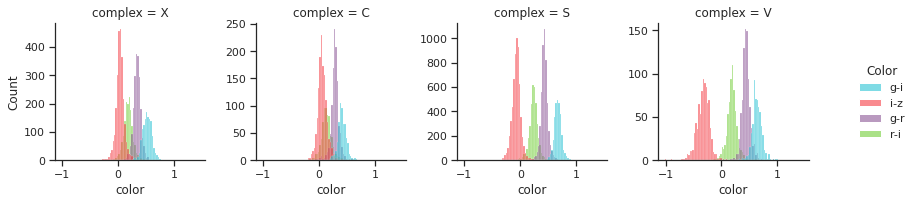

In [45]:
sns.set_theme(style="ticks")

sns.displot(df, x="color", col="complex", height=3, facet_kws=dict(margin_titles=True,sharey=False), 
    hue='Color', palette=colors)
pass

But, instead of _guessing_, we can apply PCA to determine the most meaningful colors.

## Third DataFrame

In [39]:
#skm-all: Contains the estimated taxonomy and mean colors of asteroids (now, as columns).
skmall = pd.read_csv('Skymapper-taxo-colors.csv')

In [40]:
skmall

,recno,Number,Name,DynClass,u-v,u-g,u-r,u-i,u-z,v-g,...,g-r,g-i,i-z,g-z,r-i,r-z,complex,complex1,complex2,nc
0,1,90645.0,1004 T-3,MB>Outer,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2861,0.4336,-0.0902,0.3901,0.1491,0.1056,B,pB,pU,1
1,2,20937.0,1005 T-2,MB>Outer,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4001,0.5938,-0.0486,0.5783,0.1937,0.1782,U,pU,pK,1
2,3,90646.0,1008 T-3,MB>Outer,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3349,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,5
3,4,175653.0,1014 T-3,MB>Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3244,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,5
4,5,32695.0,1016 T-2,MB>Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3035,0.5140,0.1450,0.5792,0.1982,0.2634,U,pU,pX,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120561,120562,73700.0,von Kues,MB>Outer,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4545,0.7433,-0.0547,0.6886,0.2888,0.2341,S,pU,pS,1
120562,120563,10762.0,von Laue,MB>Outer,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3667,NaN,-0.0116,NaN,NaN,NaN,K,pK,pB,2
120563,120564,2350.0,von Lude,MB>Inner,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4532,0.6629,-0.0639,0.6013,0.2097,0.1481,S,pS,pC,1
120564,120565,22788.0,von Steuben,MB>Inner,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4646,0.7226,0.0574,0.7030,0.2696,0.2424,L,pL,pU,1


If a want to aplly PCA, I need to delete NaN values. 
Future work: apply PCA with missing values (Is it possible?)

In [42]:
skmall=skmall.dropna(how='any')
skmall.Number = skmall.Number.astype(int)

In [92]:
features = ['i-z','g-r','g-i','g-z','r-i','r-z',
           'v-g','v-r','v-i','v-z',
           'u-v','u-g','u-r','u-i','u-z']

x = skmall.loc[:, features].values
x = StandardScaler().fit_transform(x) #Whitenning function
pca = PCA(n_components=5)
pca.fit(x)

PCA(n_components=5)

In [93]:
pd.DataFrame(
    data    = pca.components_,
    columns = features,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,i-z,g-r,g-i,g-z,r-i,r-z,v-g,v-r,v-i,v-z,u-v,u-g,u-r,u-i,u-z
PC1,0.139840,-0.280362,-0.284610,-0.203232,-0.217370,-0.041906,-0.277273,-0.301442,-0.313762,-0.301301,-0.102316,-0.277451,-0.302348,-0.315206,-0.308765
PC2,0.437714,-0.001248,0.161413,0.443284,0.294278,0.568624,-0.131752,-0.095960,-0.002905,0.150426,-0.205181,-0.218672,-0.168914,-0.075918,0.050022
PC3,-0.191115,0.124374,0.069790,-0.052884,-0.021247,-0.169884,0.243080,0.228222,0.179652,0.130043,-0.786657,-0.230254,-0.132635,-0.132118,-0.209222
PC4,0.500301,-0.280133,-0.399152,-0.083239,-0.408229,0.134248,0.382477,0.177653,0.052741,0.206669,-0.118140,0.234812,0.103125,-0.003313,0.131214
PC5,0.240038,0.598253,0.134318,0.271189,-0.624241,-0.179446,-0.203940,0.030760,-0.048199,0.000607,0.053352,-0.141765,0.045678,-0.026469,0.020501


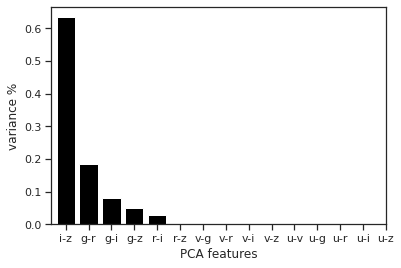

In [94]:
plt.bar(['i-z','g-r','g-i','g-z','r-i'], pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

As we see during the exploratory phase, the most important features are i-z, g-r, g-i, g-z and r-i

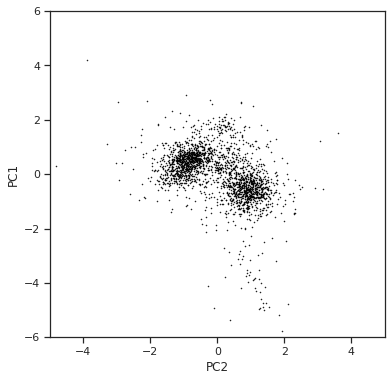

In [95]:
fig = plt.figure(figsize = (6,6))
plt.plot(x[:,1],x[:,0], linestyle='None', marker='.',markersize=1, color='black')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.xlim(-5,5)
plt.ylim(-6,6)
plt.show()

We've lost a great amount of objects because of NaN values. Now, that we know the most important features:

In [216]:
skmall = pd.read_csv('Skymapper-taxo-colors.csv')
skmall = skmall[['Number','i-z','g-r','g-i','g-z','r-i',]]
skmall = skmall.dropna(how='any')
skmall.Number = skmall.Number.astype(int)

In [4]:
features = ['i-z','g-r','g-i','g-z','r-i']
x = skmall.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=5)
pca.fit(x)

PCA(n_components=5)

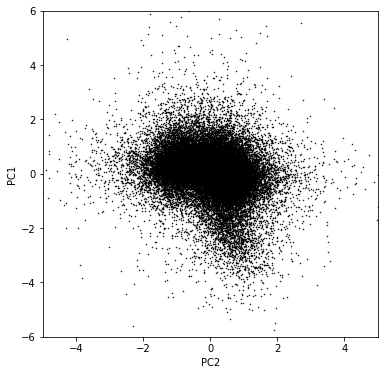

In [5]:
fig = plt.figure(figsize = (6,6))
plt.plot(x[:,1],x[:,0], linestyle='None', marker='.',markersize=1, color='black')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.xlim(-5,5)
plt.ylim(-6,6)
plt.show()

Can we include errors here? To see what happen with points far away from the clusters?

## Classification

Considering only 2 taxonomic types

In [569]:
skmall = pd.read_csv('Skymapper-taxo-colors.csv')
skmall = skmall[['Number','i-z','g-r','g-i','g-z','r-i','r-z',
           'v-g','v-r','v-i','v-z',
           'u-v','u-g','u-r','u-i','u-z','complex']]
skmall = skmall.dropna(how='any')
skmall.Number = skmall.Number.astype(int)

In [570]:
skmall = skmall[(skmall['complex'] == 'C') | (skmall['complex'] == 'S')]

In [571]:
X = skmall[['i-z', 'g-i']].to_numpy()
X = StandardScaler().fit_transform(X)

In [572]:
skmall['complex'] = skmall.complex.replace({'C': 0, 'S':1})

In [573]:
y = skmall.complex.values

In [575]:
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-10 ,10)
ylim = (-10, 10)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

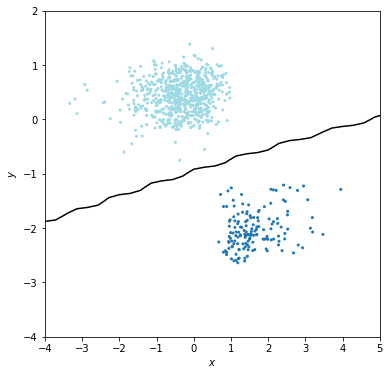

In [576]:
# Plot the results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20', zorder=2, s=4)

ax.contour(xx, yy, Z, [.5], colors='k')
plt.xlim(-4,5)
plt.ylim(-4,2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

(Weird decission boundary (kind of a circe) when using all taxonomic types. )

In [577]:
skmall = pd.read_csv('Skymapper-taxo-colors.csv')
skmall = skmall[['Number','i-z','g-r','g-i','g-z','r-i','r-z',
           'v-g','v-r','v-i','v-z',
           'u-v','u-g','u-r','u-i','u-z','complex']]
skmall = skmall.dropna(how='any')
skmall.Number = skmall.Number.astype(int)

In [578]:
X = skmall[['i-z', 'g-i']].to_numpy()
X = StandardScaler().fit_transform(X)

In [579]:
y = skmall.complex = [ ord(x) - 64 for x in skmall.complex ]
y = skmall.complex.values

In [580]:
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-10 ,10)
ylim = (-10, 10)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

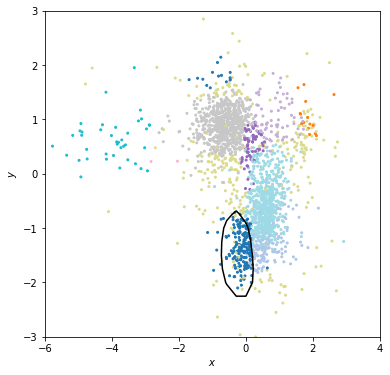

In [581]:
# Plot the results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20', zorder=2, s=4)

ax.contour(xx, yy, Z, [.5], colors='k')
plt.xlim(-6,4)
plt.ylim(-3,3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()